In [2]:
# Dataset link: https://www.kaggle.com/datasets/harinir/petrol-consumption?resource=download&select=petrol_consumption.csv

# import necessary libraries and function
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Loading the dataset
path_to_file = "gas_consumption.xls"

# Making the DataFrame of the dataset
df = pd.read_csv(path_to_file)

# Taking a peek at first 5 values
df.head()

# Checking the shape of the datset
# df.shape


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [14]:
# Description of the data in table form (T)
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


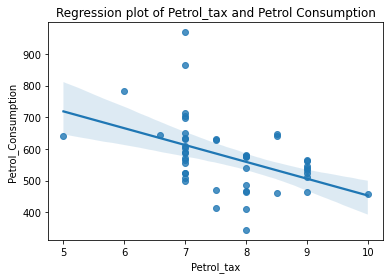

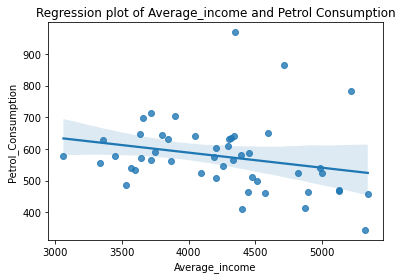

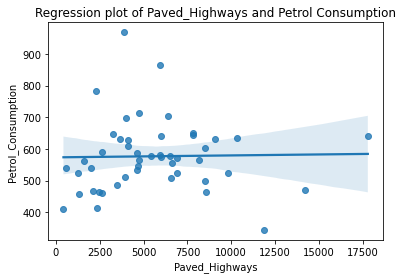

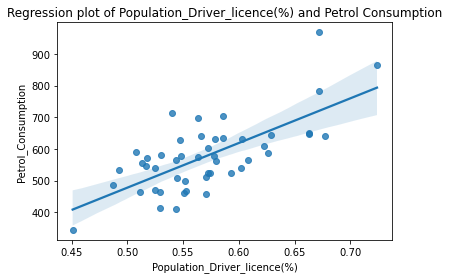

In [5]:
import seaborn as sns # Convention alias for Seaborn

features = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']
target = df['Petrol_Consumption']
for var in features:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption')

# for i, col in enumerate(features):
#     if i is 2:
#         break
#     plt.subplot(4, 1 , i+1)
#     x = df[col]
#     y = target
#     plt.scatter(x, y, marker='o')
#     plt.title(col)
#     plt.xlabel(col)
#     plt.ylabel('Petrol Consumption')

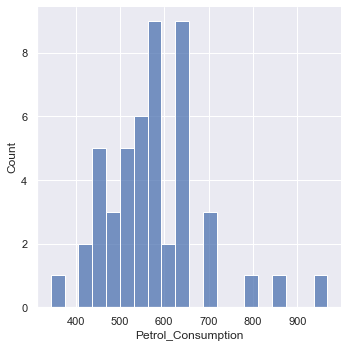

In [6]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(df['Petrol_Consumption'], bins=20)
plt.show()



<AxesSubplot:>

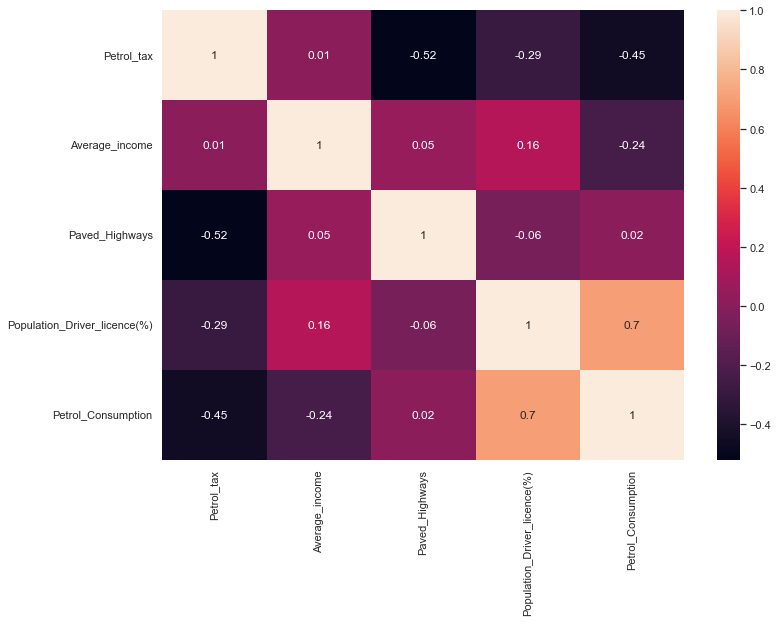

In [7]:
correlation_matrix = df.corr().round(2)
# print(correlation_matrix)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
X = pd.DataFrame(np.c_[df['Population_Driver_licence(%)'], df['Paved_Highways'], df['Average_income'],
                 df['Petrol_tax']], columns=['Population_Driver_licence', 'Paved_Highways', 'Average_income', 'Petrol_tax'])
# X = pd.DataFrame(np.c_[df['Population_Driver_licence(%)']], columns=['Population_Driver_licence'])
y = df['Petrol_Consumption']

# print(X.dtypes)
print(y.dtypes)
# print(df['Petrol_Consumption'].dtypes)


int64


In [9]:
#dividing into test and train 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(38, 4)
(10, 4)
(38,)
(10,)


In [10]:
# Training and testing model
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [11]:
feature_names = X.columns
model_coefficients = lin_model.coef_

coefficients_df = pd.DataFrame(data=model_coefficients, index=feature_names, columns=['Coefficient value'])
print(coefficients_df)


                           Coefficient value
Population_Driver_licence        1508.198558
Paved_Highways                     -0.002001
Average_income                     -0.069796
Petrol_tax                        -28.408603


In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# model evaluation for training set
y_train_pred = lin_model.predict(X_train)

# results = pd.DataFrame({'Actual': Y_train, 'Predicted': y_train_pred})
# print(results.sort_index())

rmse = (np.sqrt(mean_squared_error(Y_train, y_train_pred)))
r2 = r2_score(Y_train, y_train_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_pred = lin_model.predict(X_test)
rmse = np.sqrt((mean_squared_error(Y_test, y_test_pred)))
r2 = r2_score(Y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 63.61245950031032
R2 score is 0.6752024263880674


The model performance for testing set
--------------------------------------
RMSE is 62.645904605884056
R2 score is 0.6300637535087513


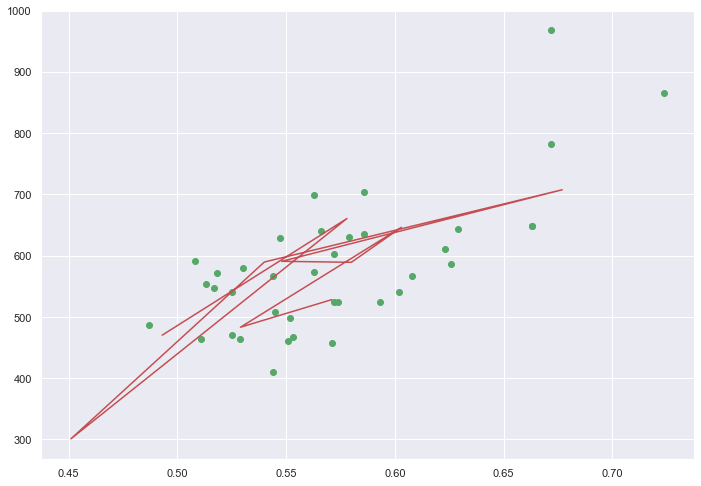

In [19]:
#plot to see
plt.scatter(X_train["Population_Driver_licence"], Y_train,color='g') 
plt.plot(X_test["Population_Driver_licence"], y_test_pred,color='r') 
